<a href="https://colab.research.google.com/github/eshita-3104/DSDBAL/blob/main/pract6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
def RemoveOutlier(df,var):
  Q1 = df[var].quantile(0.25)
  Q3 = df[var].quantile(0.75)
  IQR = Q3 - Q1
  high, low = Q3+1.5*IQR, Q1-1.5*IQR

  print("Highest allowed in variable:", var, high)
  print("lowest allowed in variable:", var, low)
  count = df[(df[var] > high) | (df[var] < low)][var].count()
  print('Total outliers in:',var,':',count)
  df = df[((df[var] >= low) & (df[var] <= high))]
  return df

In [26]:
def BuildModel(X,Y):
  from sklearn.model_selection import train_test_split

  xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size = 0.25, random_state=0)

  from sklearn.naive_bayes import GaussianNB
  model = GaussianNB()
  model = model.fit(xtrain,ytrain)

  ypred = model.predict(xtest)

  from sklearn.metrics import confusion_matrix
  cm = confusion_matrix(ytest,ypred)
  sns.heatmap(cm,annot=True)
  plt.show()

  from sklearn.metrics import classification_report
  print(classification_report(ytest, ypred))

In [27]:
df = pd.read_csv("/content/sample_data/iris.csv")

In [28]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [29]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [30]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [31]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [33]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [34]:
df['species']=df['species'].astype('category')
df['species']=df['species'].cat.codes
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


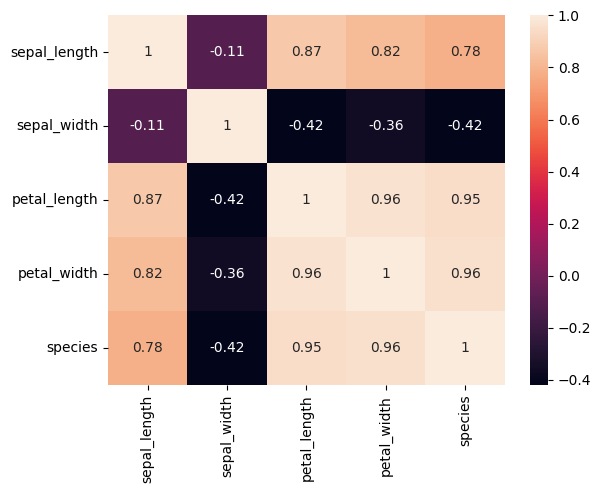

In [13]:
sns.heatmap(df.corr(),annot=True)
plt.show()


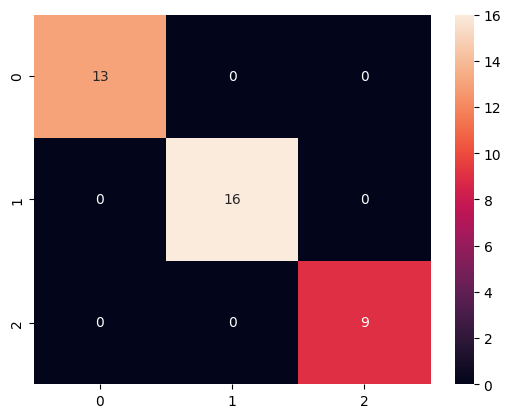

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [35]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
Y = df['species']

BuildModel(X,Y)

<Axes: >

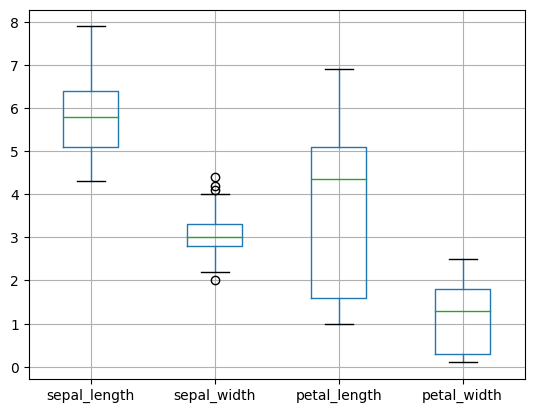

In [36]:
col = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df.boxplot(col)

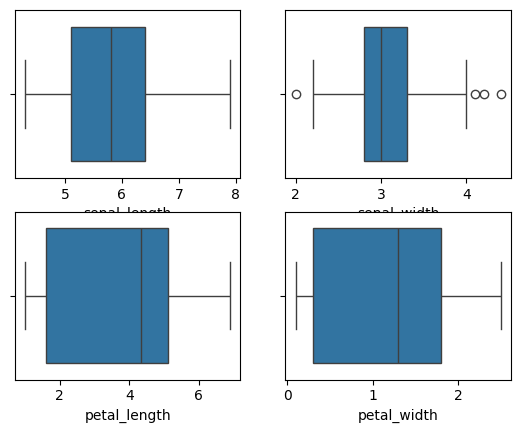

In [37]:
fig, axes = plt.subplots(2,2)
sns.boxplot(data = df, x ='sepal_length', ax=axes[0,0])
sns.boxplot(data = df, x ='sepal_width', ax=axes[0,1])
sns.boxplot(data = df, x ='petal_length', ax=axes[1,0])
sns.boxplot(data = df, x ='petal_width', ax=axes[1,1])
plt.show()

In [38]:
df=RemoveOutlier(df,'sepal_width')

Highest allowed in variable: sepal_width 4.05
lowest allowed in variable: sepal_width 2.05
Total outliers in: sepal_width : 4


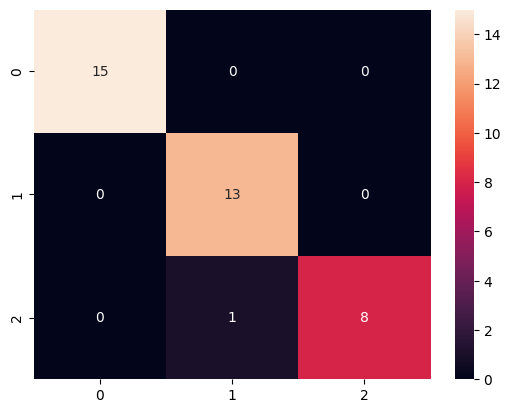

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      1.00      0.96        13
           2       1.00      0.89      0.94         9

    accuracy                           0.97        37
   macro avg       0.98      0.96      0.97        37
weighted avg       0.97      0.97      0.97        37



In [39]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
Y = df['species']
BuildModel(X, Y)